# Cepstrum

This script is to analyse the cepstral coefficients for every point in a wav file. Changing the `frame` variable you can choose which frame analyse.

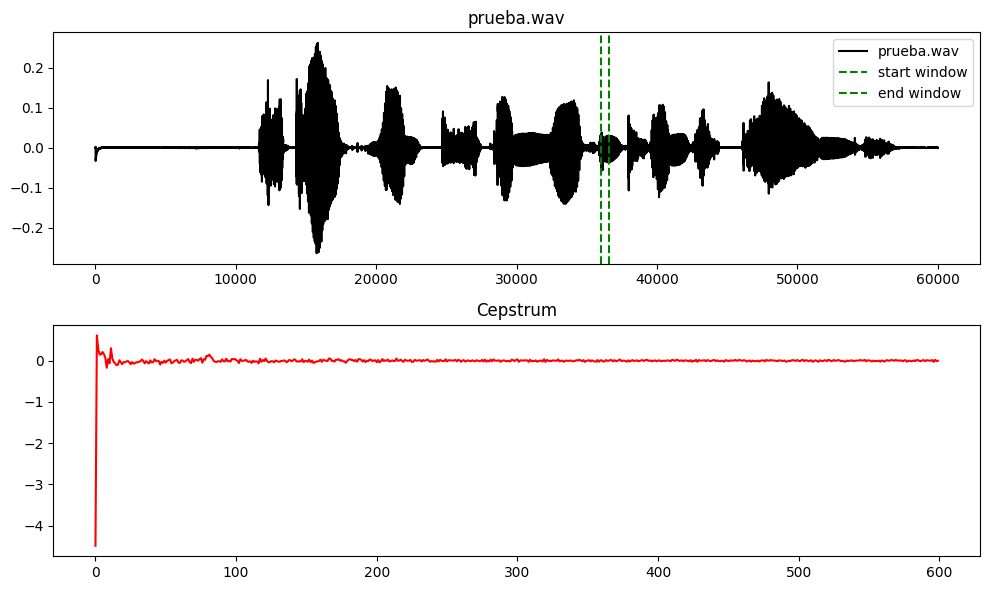

In [23]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

audio_file = "../../prueba.wav"
audio_data, sr = sf.read(audio_file)

frame = 120
start_sample = 300*frame
end_sample = int(start_sample + 0.03 * sr)  # 30 milliseconds
audio_segment = audio_data[start_sample:end_sample]
audio_data_frame_windowed = audio_segment * np.hamming(len(audio_segment))

next_pow_of_2 = int(2 ** np.ceil(np.log2(len(audio_data_frame_windowed))))
audio_processed = np.pad(audio_data_frame_windowed, (0, next_pow_of_2 - len(audio_data_frame_windowed)), mode='constant')
fft = np.fft.fft(audio_processed)

magnitude_spectrum = np.log(np.abs(fft))

cepstrum = np.fft.ifft(magnitude_spectrum)

fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(audio_data, color='black', label='prueba.wav')
axs[0].set_title('prueba.wav')
axs[0].axvline(x=start_sample, color='green', linestyle='--', label='start window')
axs[0].axvline(x=end_sample, color='green', linestyle='--', label='end window')
axs[0].legend()

axs[1].plot(cepstrum[:600], color='red')
axs[1].set_title('Cepstrum')

plt.tight_layout()
plt.show()
